In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [30]:
data_raw = load_iris()

X = data_raw["data"]
y = data_raw["target"].reshape(-1,1)

print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [32]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [34]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [36]:
mis_colores = []
for i in y:
   if i == 0:
       mis_colores.append("red")
   elif i == 1:
       mis_colores.append("green") 
   else:
       mis_colores.append("blue")

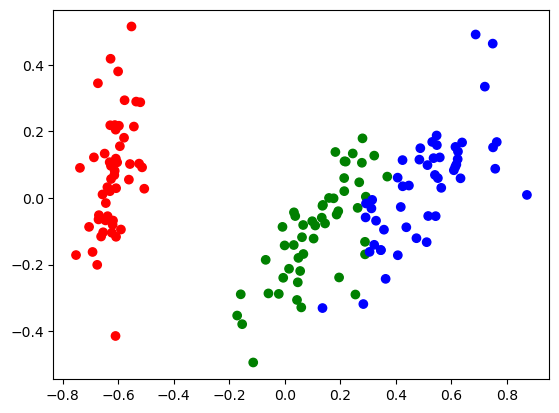

In [38]:
plt.scatter(X[:,0], X[:,1], c=mis_colores)

plt.show()

In [40]:
entradas = 2
oculta = 2
salidas = 2 
learning_rate = 0.0001 
n_epochs = 1000 

In [42]:
modelo = Sequential()
modelo.add(Dense(oculta, input_shape=(entradas,)))
modelo.add(Dense(salidas))
modelo.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse")

C:\Users\34665\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
modelo.fit(X, X, epochs = n_epochs, verbose=0)

In [46]:
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38 (156.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26 (108.00 B)

In [50]:
modelo2 = Sequential()
modelo2.add(Dense(oculta, input_shape=(entradas,)))
modelo2.layers[0].set_weights(modelo.layers[0].get_weights())

In [52]:
X_pred = modelo2.predict(X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


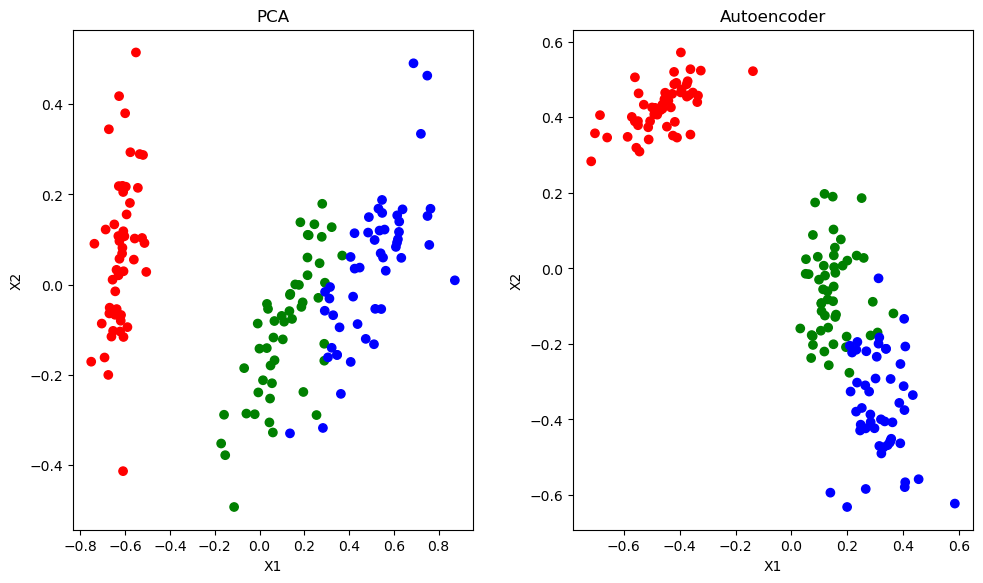

In [60]:
fig = plt.figure(figsize=(10,5))

axes1 = fig.add_axes([0,0,0.4,1])
axes2 = fig.add_axes([0.5,0,0.4,1])

axes1.scatter(X[:,0], X[:,1], c=mis_colores)
axes1.set_xlabel("X1")
axes1.set_ylabel("X2")
axes1.set_title("PCA")

axes2.scatter(X_pred[:,0], X_pred[:,1], c=mis_colores)
axes2.set_xlabel("X1")
axes2.set_ylabel("X2")
axes2.set_title("Autoencoder")

plt.show()